In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("donnees_simulation_replication_0.csv", index_col=False)
data.head()

,Jour,Susceptible,Exposed,Infected,recovered
0,0,19964,16,20,0
1,1,19943,30,24,3
2,2,19928,33,35,4
3,3,19901,51,42,6
4,4,19880,46,62,12


In [10]:
data.drop(['Jour'], axis=1, inplace=True)
data.head()

,Susceptible,Exposed,Infected,recovered
0,19964,16,20,0
1,19943,30,24,3
2,19928,33,35,4
3,19901,51,42,6
4,19880,46,62,12


In [11]:
data['Somme'] = data.sum(axis=1)

In [12]:
data['Somme'].eq(20000).all()

True

In [14]:
dt = data[['Susceptible', 'Exposed', 'Infected', 'recovered']].div(data['Somme'], axis=0)

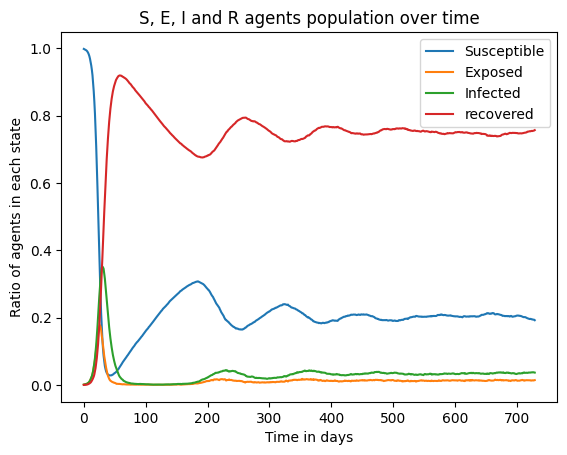

In [16]:
dt['Susceptible'].plot()
dt['Exposed'].plot()
dt['Infected'].plot()
dt['recovered'].plot()
plt.title("S, E, I and R agents population over time")
plt.xlabel("Time in days")
plt.ylabel("Ratio of agents in each state")
plt.legend()
plt.show()